In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [130]:
df = pd.read_csv('OnlineRetail.csv', encoding='latin1')

In [131]:
# InvoiceNo	(A unique code for each order (like a bill number)).
# StockCode	(A unique code for each product.)
# Description	(The name of the product.)	
# Quantity	(The number of units bought. )
# InvoiceDate	(The date and time of the purchase.	)
# UnitPrice	(Price for one unit (in British Pounds £).	)
# CustomerID	(A unique number for each customer. )
# Country	(The country where the customer lives.	)

In [132]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [134]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [135]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [136]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [137]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [138]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [139]:
df = df.drop_duplicates()

In [140]:
df.reset_index(drop=True, inplace=True)

In [141]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [143]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [144]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [145]:
df.groupby('Country')['TotalPrice'].sum()

Country
Australia                138453.810
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20440.540
Cyprus                    13502.850
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265262.460
European Community         1300.250
Finland                   22546.080
France                   208934.310
Germany                  228678.400
Greece                     4760.520
Iceland                    4310.000
Israel                     7215.840
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33375.840
RSA                 

In [146]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
# Compute RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalPrice': 'sum'                                  # Monetary
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [147]:
rfm_orginal=rfm.copy()

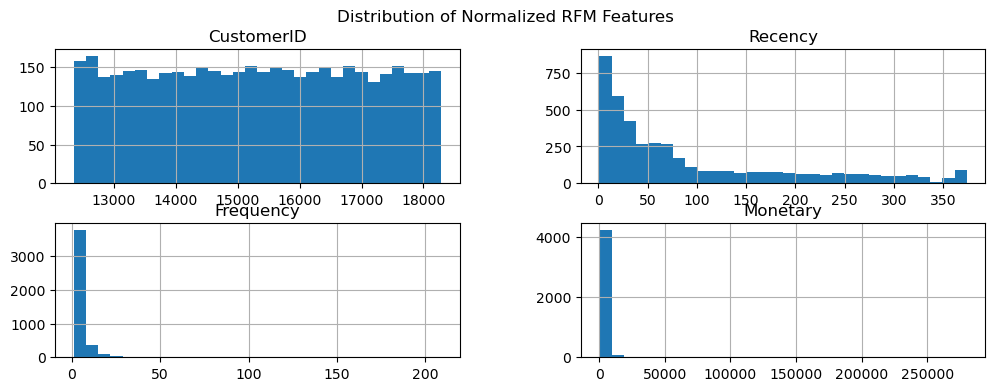

In [148]:
rfm.hist(bins=30, figsize=(12,4))
plt.suptitle("Distribution of Normalized RFM Features")
plt.show()

In [149]:
X = rfm.copy()

In [150]:
X.drop('CustomerID',axis=1,inplace=True)

In [151]:
X['Monetary']=np.log1p(X['Monetary'])
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X[['Recency','Frequency']] = pt.fit_transform(X[['Recency','Frequency']])


In [152]:
X.head()

,Recency,Frequency,Monetary
0,1.617208,-1.158367,11.253955
1,-1.818813,1.202090,8.368925
2,0.299817,0.660807,7.494564
3,-0.691951,-1.158367,7.472245
4,1.567331,-1.158367,5.815324


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [155]:
X_scaled.shape

(4338, 3)

In [156]:
X_scaled_df=pd.DataFrame(X_scaled,columns=[['Recency', 'Frequency', 'Monetary']])

In [157]:
X_scaled_df.skew()

Recency     -0.056569
Frequency    0.216627
Monetary     0.396599
dtype: float64

In [158]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)
rfm_features = ['Recency', 'Frequency', 'Monetary']
for col in rfm_features:
    print(f"{col}: {count_outliers(rfm[col])} outliers")


Recency: 155 outliers
Frequency: 285 outliers
Monetary: 425 outliers


In [159]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [160]:
for col in rfm_features:
    rfm[col]=cap_outliers(rfm[col])

In [161]:
metrics_df = pd.DataFrame(columns=['Method', 'n_clusters', 'n_noise', 'silhouette_score'])

# KMEANS

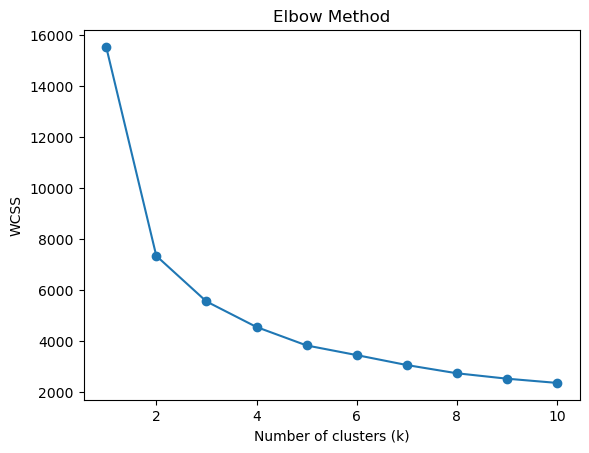

In [162]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [163]:
kmeans = KMeans(n_clusters=3, random_state=10)
rfm['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


In [164]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, rfm['KMeans_Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.35715873695035116


In [165]:
metrics_df = pd.concat([metrics_df, pd.DataFrame([{
    'Method': 'KMeans',
    'n_clusters': 3,
    'n_noise': 'NA',
    'silhouette_score': score
}])], ignore_index=True)


C:\Users\Ashvitta\AppData\Local\Temp\ipykernel_5908\602714731.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame([{


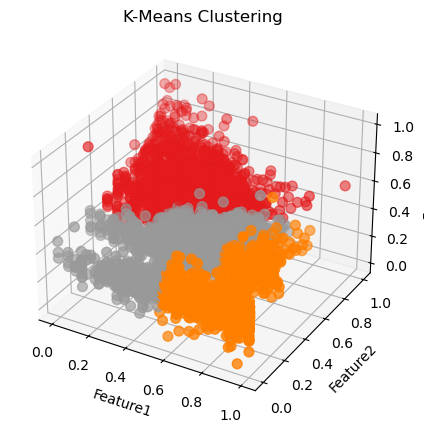

In [166]:
from mpl_toolkits.mplot3d import Axes3D
X_plot = X_scaled_df.values
labels_km =rfm['KMeans_Cluster'] 
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_plot[:,0], X_plot[:,1], X_plot[:,2], c=labels_km, cmap='Set1', s=50)
ax.set_title("K-Means Clustering")
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
plt.show()

# DBScan

In [167]:
X_scaled_df.shape

(4338, 3)

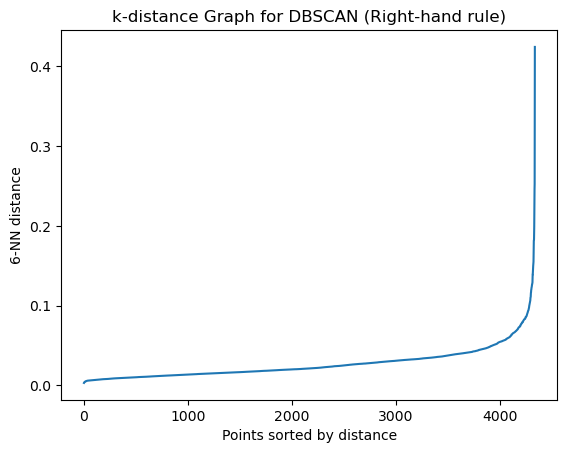

In [168]:
from sklearn.neighbors import NearestNeighbors
min_samples = 2*X_scaled_df.shape[1] # Rule of thumb: 2 * dimensions
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
# Sort distances for k-distance plot
k_distances = np.sort(distances[:, -1])
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-NN distance')
plt.title('k-distance Graph for DBSCAN (Right-hand rule)')
plt.show()

In [169]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=6)  # eps ≈ 0.1 from elbow
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [170]:
labels = rfm['DBSCAN_Cluster'].values
# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# Number of noise points
n_noise = list(labels).count(-1)
print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)

Number of clusters: 3
Number of noise points: 22


In [171]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, rfm['DBSCAN_Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.27839932195997413


In [172]:
metrics_df = pd.concat([metrics_df, pd.DataFrame([{
    'Method': 'DBSCAN',
    'n_clusters': n_clusters,
    'n_noise': n_noise,
    'silhouette_score': score
}])], ignore_index=True)


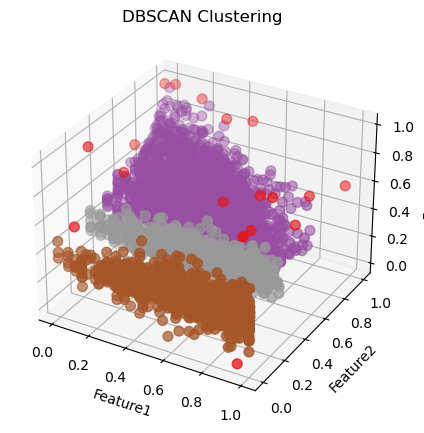

In [173]:
labels_db = rfm['DBSCAN_Cluster']
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_plot[:,0], X_plot[:,1], X_plot[:,2], c=labels_db, cmap='Set1', s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
plt.show()


# Hierarchical Cluster

In [174]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
hier = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = hier.fit_predict(X_scaled)
X_scaled_df['Hier_Cluster']=labels
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


In [175]:
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")
# Number of clusters
print(f"Number of clusters: {len(set(labels))}")
# Hierarchical clustering has no noise points
n_noise = 0
print(f"Number of noise points: {n_noise}")


Silhouette Score: 0.334
Number of clusters: 3
Number of noise points: 0


In [176]:
metrics_df = pd.concat([metrics_df, pd.DataFrame([{
    'Method': 'HIER',
    'n_clusters': len(set(labels)),
    'n_noise': 'NA',
    'silhouette_score': sil_score
}])], ignore_index=True)


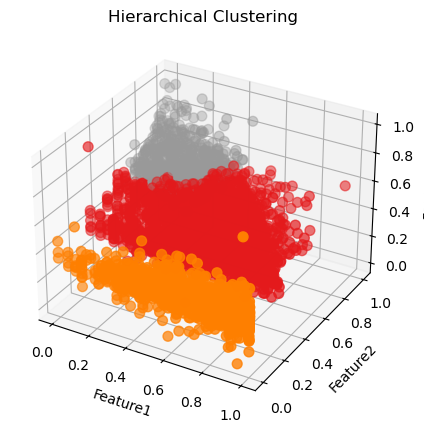

In [177]:
labels_hier = hier.fit_predict(X_plot)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_plot[:,0], X_plot[:,1], X_plot[:,2], c=labels_hier, cmap='Set1', s=50)
ax.set_title("Hierarchical Clustering")
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
plt.show()

In [178]:
metrics_df

,Method,n_clusters,n_noise,silhouette_score
0,KMeans,3,NA,0.357159
1,DBSCAN,3,22,0.278399
2,HIER,3,NA,0.334137


In [179]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [180]:
rfm

,CustomerID,Recency,Frequency,Monetary,KMeans_Cluster,DBSCAN_Cluster
0,12346.0,326,1,3691.77,1,-1
1,12347.0,2,7,3691.77,0,0
2,12348.0,75,4,1797.24,2,0
3,12349.0,19,1,1757.55,2,1
4,12350.0,310,1,334.40,1,1
...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,1,1
4334,18281.0,181,1,80.82,1,1
4335,18282.0,8,2,178.05,2,2
4336,18283.0,4,11,2045.53,0,0


In [181]:
rfm_orginal['Cluster']=rfm['KMeans_Cluster']